In [ ]:
%matplotlib inline


# Approximate and subdivide polygons


This example shows how to approximate (Douglas-Peucker algorithm) and subdivide
(B-Splines) polygonal chains.




Number of coordinates: 22 704 26
Number of coordinates: 1173 32 9
Number of coordinates: 701 21 5


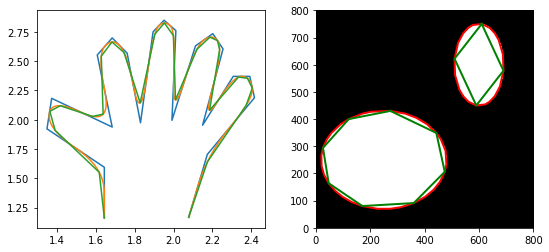

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon


hand = np.array([[1.64516129, 1.16145833],
                 [1.64516129, 1.59375],
                 [1.35080645, 1.921875],
                 [1.375, 2.18229167],
                 [1.68548387, 1.9375],
                 [1.60887097, 2.55208333],
                 [1.68548387, 2.69791667],
                 [1.76209677, 2.56770833],
                 [1.83064516, 1.97395833],
                 [1.89516129, 2.75],
                 [1.9516129, 2.84895833],
                 [2.01209677, 2.76041667],
                 [1.99193548, 1.99479167],
                 [2.11290323, 2.63020833],
                 [2.2016129, 2.734375],
                 [2.25403226, 2.60416667],
                 [2.14919355, 1.953125],
                 [2.30645161, 2.36979167],
                 [2.39112903, 2.36979167],
                 [2.41532258, 2.1875],
                 [2.1733871, 1.703125],
                 [2.07782258, 1.16666667]])

# subdivide polygon using 2nd degree B-Splines
new_hand = hand.copy()
for _ in range(5):
    new_hand = subdivide_polygon(new_hand, degree=2, preserve_ends=True)

# approximate subdivided polygon with Douglas-Peucker algorithm
appr_hand = approximate_polygon(new_hand, tolerance=0.02)

print("Number of coordinates:", len(hand), len(new_hand), len(appr_hand))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

ax1.plot(hand[:, 0], hand[:, 1])
ax1.plot(new_hand[:, 0], new_hand[:, 1])
ax1.plot(appr_hand[:, 0], appr_hand[:, 1])


# create two ellipses in image
img = np.zeros((800, 800), 'int32')
rr, cc = ellipse(250, 250, 180, 230, img.shape)
img[rr, cc] = 1
rr, cc = ellipse(600, 600, 150, 90, img.shape)
img[rr, cc] = 1

plt.gray()
ax2.imshow(img)

# approximate / simplify coordinates of the two ellipses
for contour in find_contours(img, 0):
    coords = approximate_polygon(contour, tolerance=2.5)
    ax2.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
    coords2 = approximate_polygon(contour, tolerance=39.5)
    ax2.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
    print("Number of coordinates:", len(contour), len(coords), len(coords2))

ax2.axis((0, 800, 0, 800))

plt.show()